<a href="https://colab.research.google.com/github/LuciferX45/Signal-Image-Processing-Labs/blob/main/SIP_LAB_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SIP LAB 6**
# **Gautam Padhi**
# I034 B2
# BTech AI SEM IV


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
img= cv2.imread("Test.tif",0)

In [ ]:
img_fft= np.fft.fft2(img, s=None, axes=(-2, -1), norm=None)
img_fft= np.fft.fftshift(img_fft)

In [ ]:
m,n= img_fft.shape

## IDEAL FILTER

In [ ]:
def ideal_lpf_hpf(img,d0):
  #Creating lpf and hpf masks
  lpf= img.copy()
  hpf= img.copy()

  for i in range(m):
    for j in range(n):
      d1= np.sqrt((i-m//2)**2 +(j-n//2)**2) #formula for D(u,v)
      if d1>d0: #comparing D1 n D0
        lpf[i,j]=0
        hpf[i,j]=1
      else:
        lpf[i,j]= 1
        hpf[i,j]=0

  ideal_image(lpf,hpf,d0)

In [ ]:
def ideal_image(lpf,hpf,d0):

  img_lpf= img_fft*lpf # multiply lpf mask 
  img_lpf= np.fft.fftshift(img_lpf)
  img_new_lpf= np.real(np.fft.ifft2(img_lpf)) #final lpf image

  img_hpf= img_fft*hpf # multiply hpf mask  
  img_hpf= np.fft.fftshift(img_hpf)
  img_new_hpf= np.real(np.fft.ifft2(img_hpf)) #final hdf image

  #Plot original, low pass filtered and high pass filtered image
  plt.figure(figsize=(15,10))
  plt.subplot(1,3,1)
  plt.title("Original Image")
  plt.imshow(img,cmap="gray")
  plt.subplot(1,3,2)
  plt.title("Low Pass Filtered Image for radius = " +str(d0))
  plt.imshow(img_new_lpf,cmap="gray")
  plt.subplot(1,3,3)
  plt.title("High Pass filtered image for radius = " +str(d0))
  plt.imshow(img_new_hpf,cmap="gray", vmin=0, vmax=255)

Enter radius: 10
Enter radius: 30
Enter radius: 50
Enter radius: 80
Enter radius: 100


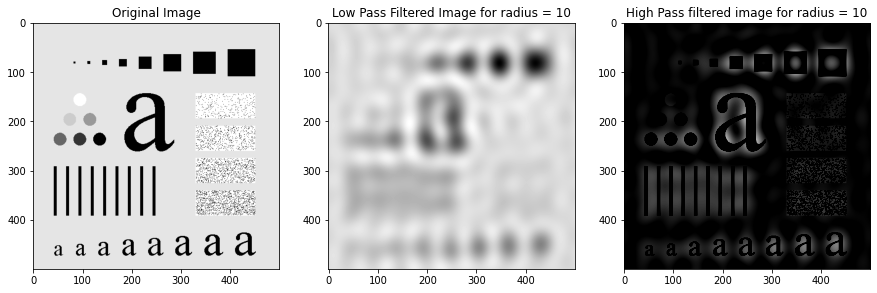

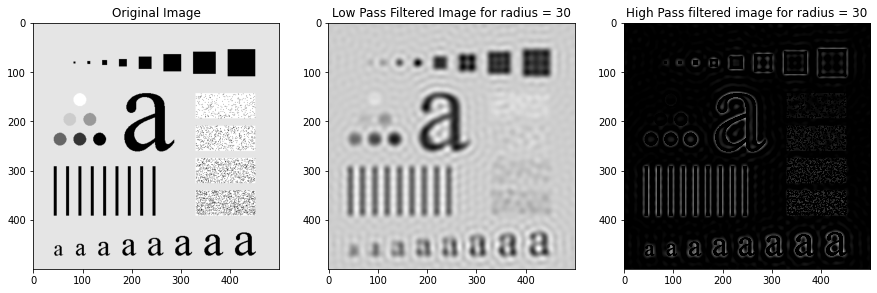

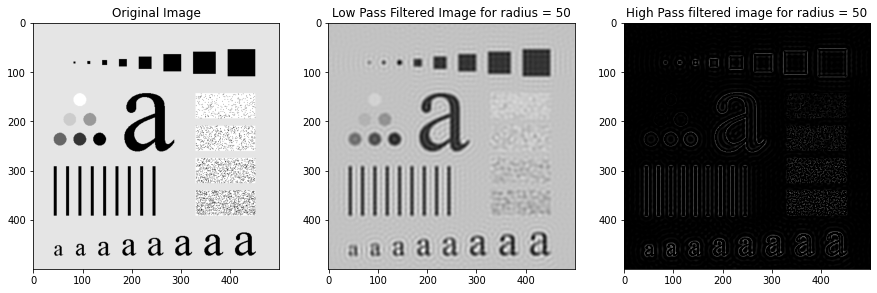

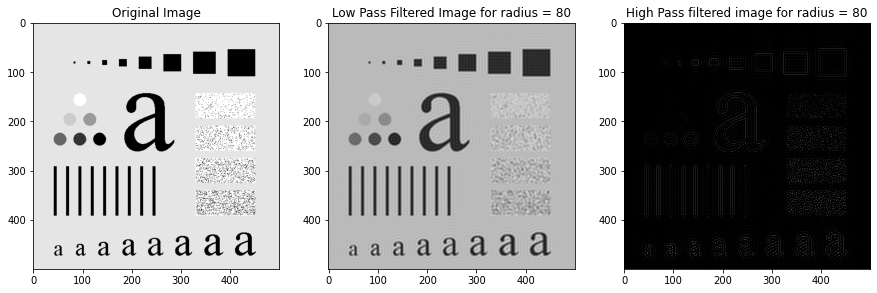

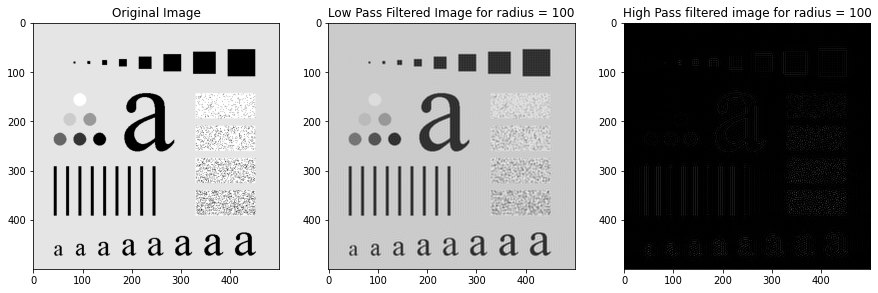

In [ ]:
for i in range(5):
  d0 = int(input("Enter radius: "))
  ideal_lpf_hpf(img,d0)

## BUTTERWORTH FILTER

In [ ]:
def bw_lpf_hpf(img,d0,x):
  #Creating lpf and hpf masks
  bw_lpf= img.copy()
  bw_hpf= img.copy()

  for i in range(m):
    for j in range(n):
      d1= np.sqrt((i-m//2)**2 +(j-n//2)**2) #formula for D(u,v)
      bw_lpf[i,j]= 1/(1+(d0/d1)**(2*x)) #formula for butterworth low pass
      bw_hpf[i,j]= 1/(1+(d1/d0)**(2*x)) #formula for butterworth high pass

  bw_image(bw_lpf,bw_hpf,d0)

In [ ]:
def bw_image(bw_lpf,bw_hpf,d0):

  img_lpf= img_fft*bw_lpf # multiply lpf mask 
  img_lpf= np.fft.fftshift(img_lpf)
  img_new_lpf= np.real(np.fft.ifft2(img_lpf)) #final lpf image

  img_hpf= img_fft*bw_hpf # multiply hpf mask  
  img_hpf= np.fft.fftshift(img_hpf)
  img_new_hpf= np.real(np.fft.ifft2(img_hpf)) #final hdf image

  #Plot original, low pass filtered and high pass filtered image
  plt.figure(figsize=(15,10))
  plt.subplot(1,3,1)
  plt.title("Original Image")
  plt.imshow(img,cmap="gray")
  plt.subplot(1,3,2)
  plt.title("Low Pass Filtered Image for radius = " +str(d0))
  plt.imshow(img_new_lpf,cmap="gray")
  plt.subplot(1,3,3)
  plt.title("High Pass filtered image for radius = " +str(d0))
  plt.imshow(img_new_hpf,cmap="gray", vmin=0, vmax=255)

Enter the order: 65
Enter radius: 10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  if __name__ == '__main__':


Enter radius: 30
Enter radius: 50
Enter radius: 80
Enter radius: 100


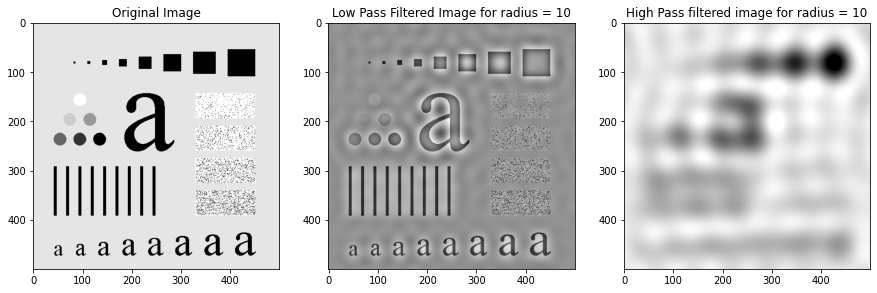

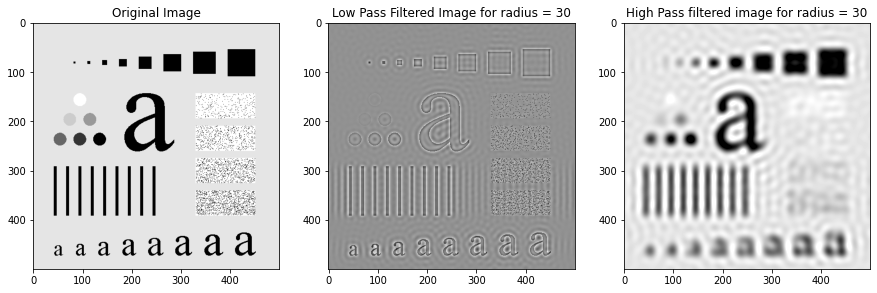

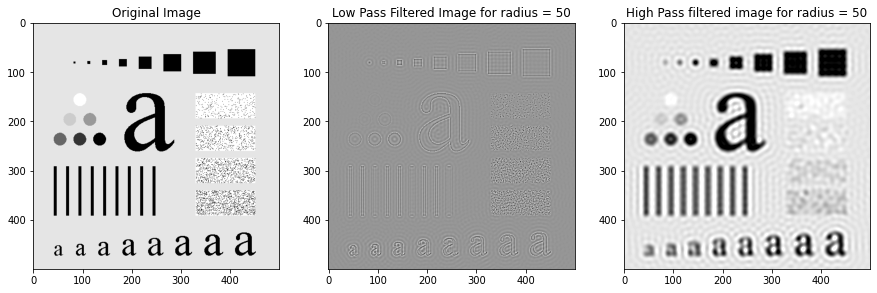

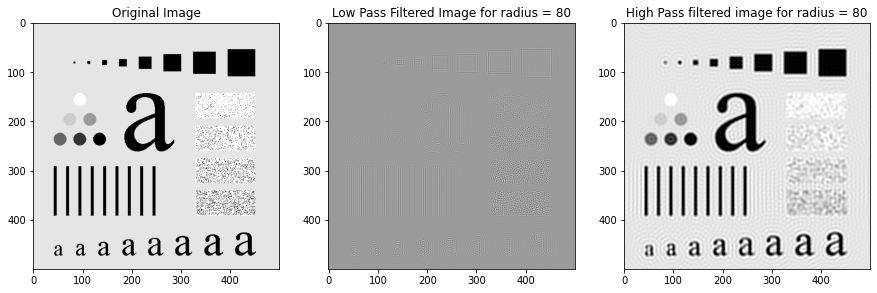

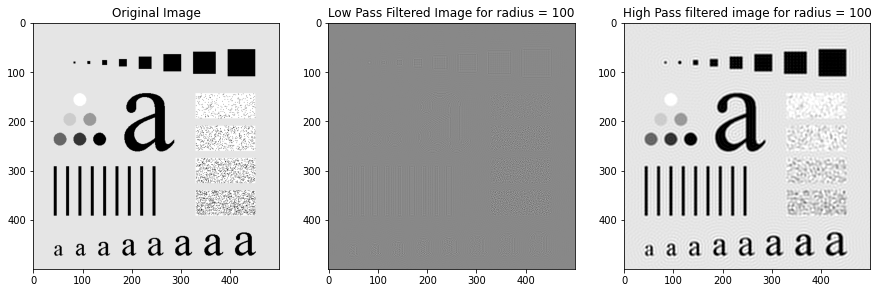

In [ ]:
x = int(input("Enter the order: "))
for i in range(5):
  d0 = int(input("Enter radius: "))
  bw_lpf_hpf(img,d0,x)

## **CONCLUSION**
We learnt to apply frequency domain filtering using ideal filter and butterworth filter